# Importing necessary libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# Data Preparation

In [14]:
scaler   = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Model Building

In [7]:
X = cancer_data.data
y = cancer_data.target

In [10]:
X = pd.DataFrame(data = X, columns=cancer_data['feature_names'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
X.std()

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [15]:
x_scaled.std()

1.0

In [16]:
x_scaled.mean() # It should be 0. 

-6.118909323768877e-16

In [18]:
X.shape,y.shape

((569, 30), (569,))

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 12,stratify = y)

In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 30), (455,), (114, 30), (114,))

# Kernel - Linear
### Model Training without scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.9561
Precision        :  0.9467
Recall           :  0.9861
AUC Score        :  0.9454
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

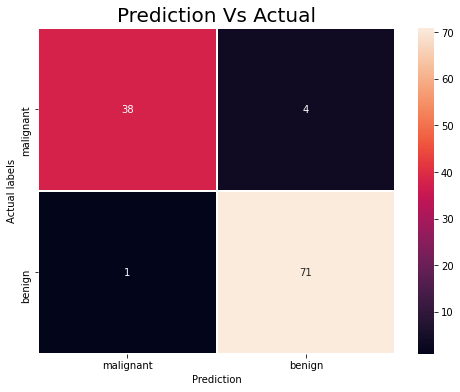

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=cancer_data.target_names,
            yticklabels=cancer_data.target_names,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

### Model Training with scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.9737
Precision        :  0.9726
Recall           :  0.9861
AUC Score        :  0.9692
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

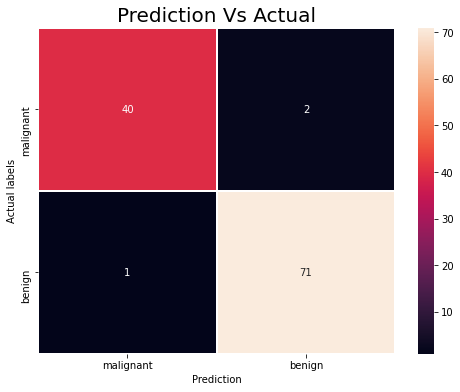

In [54]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='linear',)
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=cancer_data.target_names,
            yticklabels=cancer_data.target_names,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# Kernel - Polynomial
### Model Training with scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.9825
Precision        :  0.973
Recall           :  1.0
AUC Score        :  0.9762
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

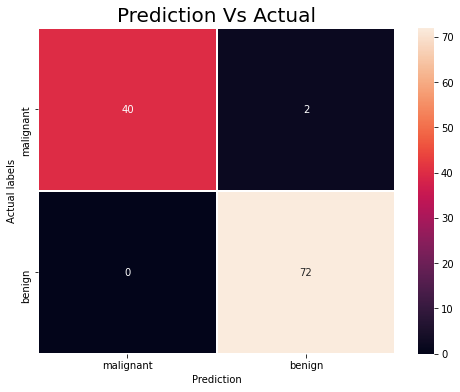

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='poly',degree = 1) #When poly degree = 1, it is a linear kernel
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=cancer_data.target_names,
            yticklabels=cancer_data.target_names,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# Kernel - Rbf
### Model Training with scaling | Model Testing | Model Evaluation 

Overall Accuracy :  0.9737
Precision        :  0.9726
Recall           :  0.9861
AUC Score        :  0.9692
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

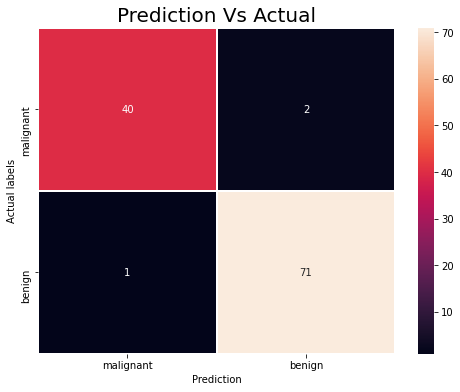

In [70]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 12,stratify = y)

svc_classifier = SVC(kernel='rbf', C=1,gamma = 0.02) #When poly degree = 1, it is a linear kernel
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            xticklabels=cancer_data.target_names,
            yticklabels=cancer_data.target_names,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)